In [ ]:
# hide
%load_ext autoreload
%autoreload 2

In [ ]:
# hide
from nbdev import *

In [ ]:
# hide
import os

import numpy as np
import pandas as pd
from tqdm import tqdm
import ipywidgets as widgets
from pathlib import Path
from IPython.display import JSON

from ipyannotator.annotator import Annotator
from ipyannotator.base import Settings
from ipyannotator.mltypes import InputImage, OutputImageBbox, OutputImageLabel
from ipyannotator.datasets.factory_legacy import DS, get_settings, _combine_train_test
from ipyannotator.datasets.generators import create_object_detection, xyxy_to_xywh, xywh_to_xyxy
from ipyannotator.helpers import Tutorial
from ipyannotator.storage import construct_annotation_path

# Tutorial: BBox

## Select Dataset

In [ ]:
# We use an artifical generated classification dataset by default that doesn't require downloading.

dataset = DS.ARTIFICIAL_DETECTION

## Setup annotator

In [ ]:
# get special project settings for selected dataset

settings_ = get_settings(dataset)
settings_.project_file, settings_.image_dir

In [ ]:
input_ = InputImage(image_dir=settings_.image_dir,
                    image_width=settings_.im_width,
                    image_height=settings_.im_height)

output_ = OutputImageBbox(classes=['Circle', 'Rectangle'])

input_.dir

In [ ]:
anni = Annotator(input_, output_, settings_)

## EXPLORE
You can explore dataset with next/previous buttons to check visualized bounding boxes.

In [ ]:
explorer = anni.explore()
explorer

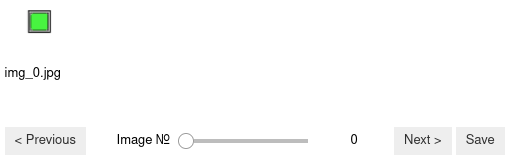

In [ ]:
# todo: differs from im2im
# explorer._controller.images[:3]

## CREATE

In [ ]:
if dataset == DS.ARTIFICIAL_DETECTION:
    ! rm -rf data/artificial_detection/create_results

In [ ]:
creator = anni.create()

creator

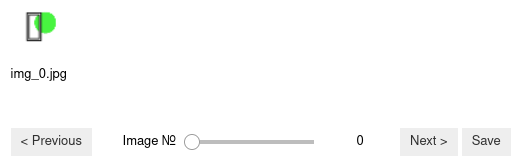

#### To imitate human work on the current step, let's randomly annotate all the images automatically:

In [ ]:
#SKIP THIS STEP IF YOU ANNOTATE MANUALLY

HELPER = Tutorial(dataset, settings_.project_path)
HELPER.add_random_bboxes(creator)

## IMPROVE

On this step we explore annotated images, selecting all __missed__ or __incorrect__ bounding boxes.

In [ ]:
if dataset == DS.ARTIFICIAL_DETECTION:
    ! rm -rf data/artificial_detection/create_results/missed

In [ ]:
improver = anni.improve()

In [ ]:
improver

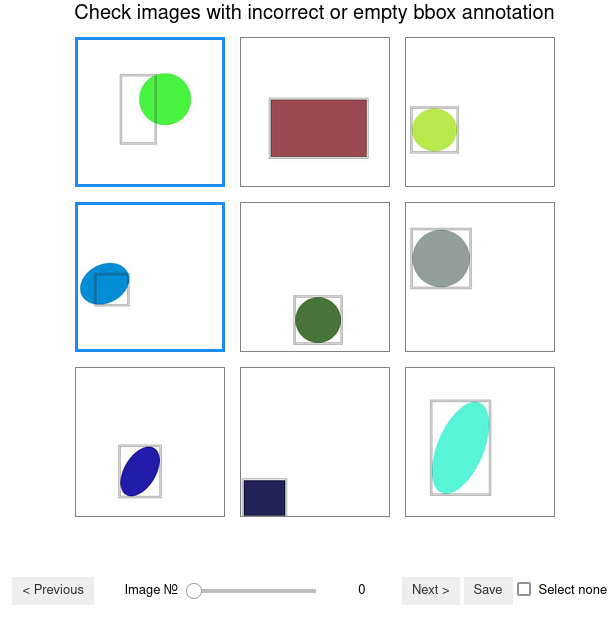

In [ ]:
#SKIP THIS STEP IF YOU FIX MANUALLY

HELPER.fix_incorrect_bboxes(improver, creator)

Get the list of images with incorrect bboxes

In [ ]:
[k for k, v in improver.to_dict().items() if v == {'answer': True}]